AG2 - Miguel Houghton López

Usuario de Driven Data: houghton97 (principal) / houghton1997 (submission adicional)

In [200]:
# carga de datos
import pandas as pd
import io
#from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor






# Carga de Datos

In [201]:
train_feat = pd.read_csv('C:/Users/Miguel/Documents/VIU/7-MACHINE_LEARNING/VIU_ML/Actividades/AG2/dengue_features_train.csv')
train_feat.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [202]:
train_feat.shape

(1456, 24)

Posteriormente subimos los datos que únicamente nos proporcionan el número de casos de dengue para las semanas de entrenamiento (dengue_labels_train)

In [203]:
train_labels = pd.read_csv('C:/Users/Miguel/Documents/VIU/7-MACHINE_LEARNING/VIU_ML/Actividades/AG2/dengue_labels_train.csv')
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


Mezclamos los dos conjuntos de datos para tenerlos en un único dataframe

In [204]:
train = pd.merge(train_feat,train_labels,on=['city', 'year', 'weekofyear'])

train.head()


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [205]:
test = pd.read_csv('C:/Users/Miguel/Documents/VIU/7-MACHINE_LEARNING/VIU_ML/Actividades/AG2/dengue_features_test.csv')
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [206]:
test.shape

(416, 24)

# Preproceso



In [207]:
test.drop("week_start_date", axis = 1, inplace = True)
train.drop("week_start_date", axis = 1, inplace = True)
train.head()


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Trataremos los valores perdidos que los hay dado que nos evitarían tener un modelo de los datos que tenemos.

In [208]:
pd.isnull(train).sum()

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_pr

In [209]:
train.fillna(method='ffill', inplace=True)
pd.isnull(train).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_t

Y aplicamos lo mismo para el test

In [210]:
test.fillna(method='ffill', inplace=True)
pd.isnull(test).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_t

In [211]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
train['city_bin'] = lb.fit_transform(train['city'])
test['city_bin'] = lb.fit_transform(test['city'])

In [212]:
train.tail()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_bin
1451,iq,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5,0
1452,iq,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8,0
1453,iq,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1,0
1454,iq,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1,0
1455,iq,2010,25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,299.835714,...,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4,4,0


### Selección de características

In [213]:
# Primero convertimos a índices las columnas city, year y weekofyear
dengue_select_train = train.reset_index()
dengue_select_test = test.reset_index()
dengue_select_train = train.set_index(['weekofyear','year', 'city'])
dengue_select_test = test.set_index(['weekofyear','year', 'city'])

In [214]:
print(dengue_select_train.head(5))
print(dengue_select_test.head(5))

                       ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
weekofyear year city                                           
18         1990 sj    0.122600  0.103725  0.198483  0.177617   
19         1990 sj    0.169900  0.142175  0.162357  0.155486   
20         1990 sj    0.032250  0.172967  0.157200  0.170843   
21         1990 sj    0.128633  0.245067  0.227557  0.235886   
22         1990 sj    0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
weekofyear year city                                                
18         1990 sj                   12.42             297.572857   
19         1990 sj                   22.82             298.211429   
20         1990 sj                   34.54             298.781429   
21         1990 sj                   15.36             298.987143   
22         1990 sj                    7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_t

In [215]:
feat_train_select = transpose(dengue_select_train)
names_train_select = feat_train_select.index
feat_train_select

weekofyear,18,19,20,21,22,23,24,25,26,27,...,16,17,18,19,20,21,22,23,24,25
year,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,...,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010
city,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,...,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq
ndvi_ne,0.122600,0.169900,0.032250,0.128633,0.196200,0.196200,0.112900,0.072500,0.102450,0.102450,...,0.231486,0.239743,0.260814,0.168686,0.263071,0.342750,0.160157,0.247057,0.333914,0.298186
ndvi_nw,0.103725,0.142175,0.172967,0.245067,0.262200,0.174850,0.092800,0.072500,0.146175,0.121550,...,0.294686,0.259271,0.255786,0.158500,0.272500,0.318900,0.160371,0.146057,0.245771,0.232971
ndvi_se,0.198483,0.162357,0.157200,0.227557,0.251200,0.254314,0.205071,0.151471,0.125571,0.160683,...,0.331657,0.307786,0.257771,0.133071,0.258271,0.256343,0.136043,0.250357,0.278886,0.274214
ndvi_sw,0.177617,0.155486,0.170843,0.235886,0.247340,0.181743,0.210271,0.133029,0.123600,0.202567,...,0.244400,0.307943,0.340286,0.145600,0.244500,0.292514,0.225657,0.233714,0.325486,0.315757
precipitation_amt_mm,12.420000,22.820000,34.540000,15.360000,7.520000,9.580000,3.480000,151.120000,19.320000,14.410000,...,86.700000,26.000000,73.970000,59.400000,1.150000,55.300000,86.470000,58.940000,59.670000,63.220000
reanalysis_air_temp_k,297.572857,298.211429,298.781429,298.987143,299.518571,299.630000,299.207143,299.591429,299.578571,300.154286,...,298.438571,299.048571,297.617143,297.278571,297.648571,299.334286,298.330000,296.598571,296.345714,298.097143
reanalysis_avg_temp_k,297.742857,298.442857,298.878571,299.228571,299.664286,299.764286,299.221429,299.528571,299.557143,300.278571,...,299.507143,300.028571,298.585714,297.935714,298.707143,300.771429,299.392857,297.592857,297.521429,299.835714
reanalysis_dew_point_temp_k,292.414286,293.951429,295.434286,295.310000,295.821429,295.851429,295.865714,296.531429,296.378571,296.651429,...,297.678571,296.468571,296.975714,296.738571,293.227143,296.825714,296.452857,295.501429,295.324286,295.807143


### Nos concentramos en el dataset de train al tener muchas más muestras

C:\Users\Miguel\AppData\Local\Temp/ipykernel_5160/3521527430.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(R_sj, dtype=np.bool)


<AxesSubplot:>

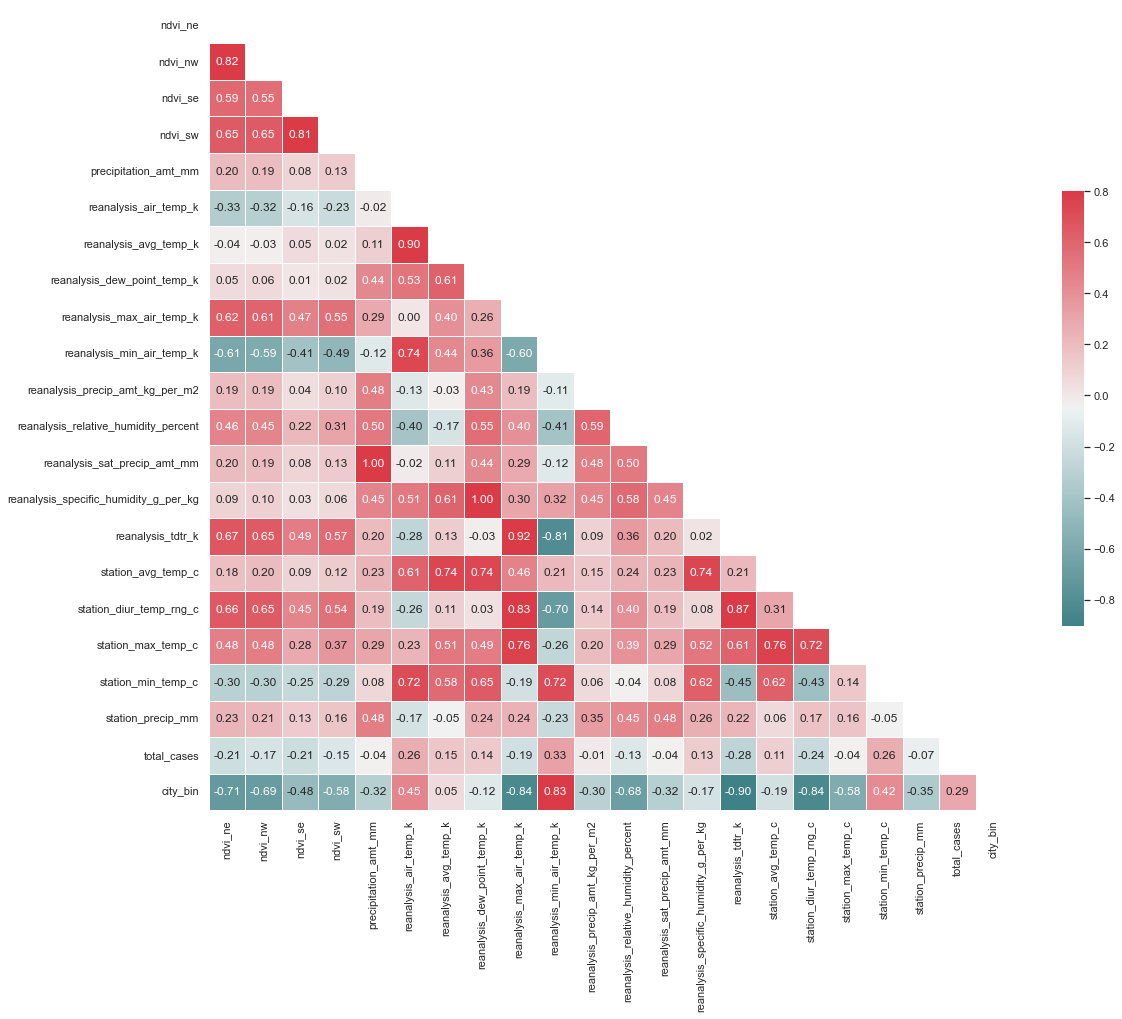

In [216]:
#Calculamos la matriz de correlaciones
R_sj = corrcoef(feat_train_select)

sns.set(style="white")
mask = np.zeros_like(R_sj, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 16))

cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(R_sj, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names_train_select, yticklabels=names_train_select, annot=True, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Nos centramos en las características demasiado relacionadas para eliminarlas (+0.95)

C:\Users\Miguel\AppData\Local\Temp/ipykernel_5160/561818420.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(R1_sj, dtype=np.bool)


<AxesSubplot:>

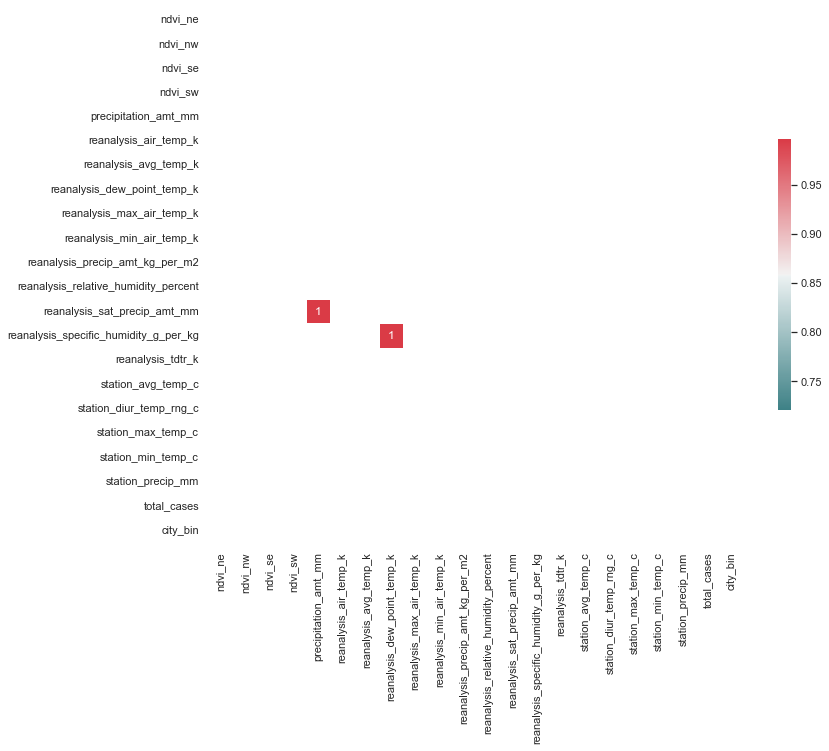

In [217]:
R1_sj = R_sj
for i in range(len(R1_sj)):
  for j in range(len(R1_sj)):
    if abs(R1_sj[i,j]) >= 0.95:
      R1_sj[i,j] = abs(R1_sj[i,j])
    else:
      R1_sj[i,j] = 'NaN'

sns.set(style="white")
mask = np.zeros_like(R1_sj, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(R1_sj, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names_train_select, yticklabels=names_train_select, annot=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [218]:
# Eliminamos las variables
train.drop(['precipitation_amt_mm', 'reanalysis_dew_point_temp_k'],axis=1,inplace=True)
train

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_bin
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,297.572857,297.742857,299.8,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,298.211429,298.442857,300.9,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,298.781429,298.878571,300.5,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,298.987143,299.228571,301.4,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,299.518571,299.664286,301.9,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,0.342750,0.318900,0.256343,0.292514,299.334286,300.771429,309.7,...,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5,0
1452,iq,2010,22,0.160157,0.160371,0.136043,0.225657,298.330000,299.392857,308.5,...,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8,0
1453,iq,2010,23,0.247057,0.146057,0.250357,0.233714,296.598571,297.592857,305.5,...,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1,0
1454,iq,2010,24,0.333914,0.245771,0.278886,0.325486,296.345714,297.521429,306.1,...,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1,0


In [219]:
# Eliminamos las variables
test.drop(['precipitation_amt_mm', 'reanalysis_dew_point_temp_k'],axis=1,inplace=True)
test

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_bin
0,sj,2008,18,-0.018900,-0.018900,0.102729,0.091200,298.492857,298.550000,301.1,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1
1,sj,2008,19,-0.018000,-0.012400,0.082043,0.072314,298.475714,298.557143,300.8,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1
2,sj,2008,20,-0.001500,-0.012400,0.151083,0.091529,299.455714,299.357143,302.2,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1
3,sj,2008,21,-0.001500,-0.019867,0.124329,0.125686,299.690000,299.728571,303.0,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1
4,sj,2008,22,0.056800,0.039833,0.062267,0.075914,299.780000,299.671429,302.3,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,0.301471,0.380029,0.280629,0.383186,297.774286,298.964286,305.5,...,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,0
412,iq,2013,23,0.247600,0.296343,0.285371,0.350357,297.167143,298.328571,306.3,...,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,0
413,iq,2013,24,0.238729,0.251029,0.252586,0.249771,295.831429,296.607143,304.6,...,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,0
414,iq,2013,25,0.310429,0.302700,0.406614,0.403943,295.778571,297.400000,305.9,...,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,0


En este punto hemos eliminado las variables que están demasiado relacionadas. 
Procedemos a selección de variables más relevantes:

C:\Users\Miguel\AppData\Local\Temp/ipykernel_5160/1311607698.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(R_sj, dtype=np.bool)


<AxesSubplot:>

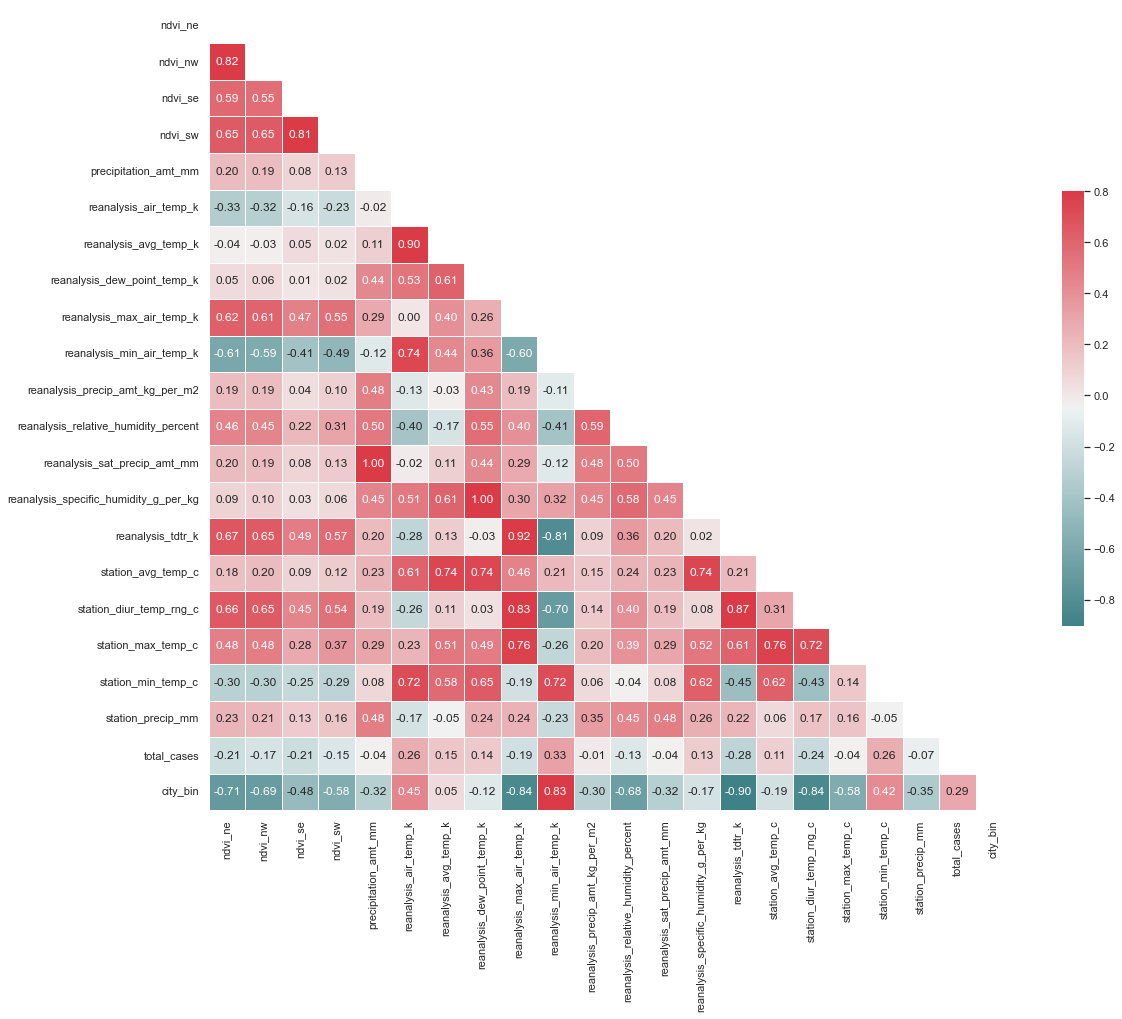

In [220]:
feat_train_select = transpose(dengue_select_train)
names_train_select = feat_train_select.index

feat_train_select
#Calculamos la matriz de correlaciones
R_sj = corrcoef(feat_train_select)

sns.set(style="white")
mask = np.zeros_like(R_sj, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 16))

cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(R_sj, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names_train_select, yticklabels=names_train_select, annot=True, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


C:\Users\Miguel\AppData\Local\Temp/ipykernel_5160/4017288938.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(R1_sj, dtype=np.bool)


<AxesSubplot:>

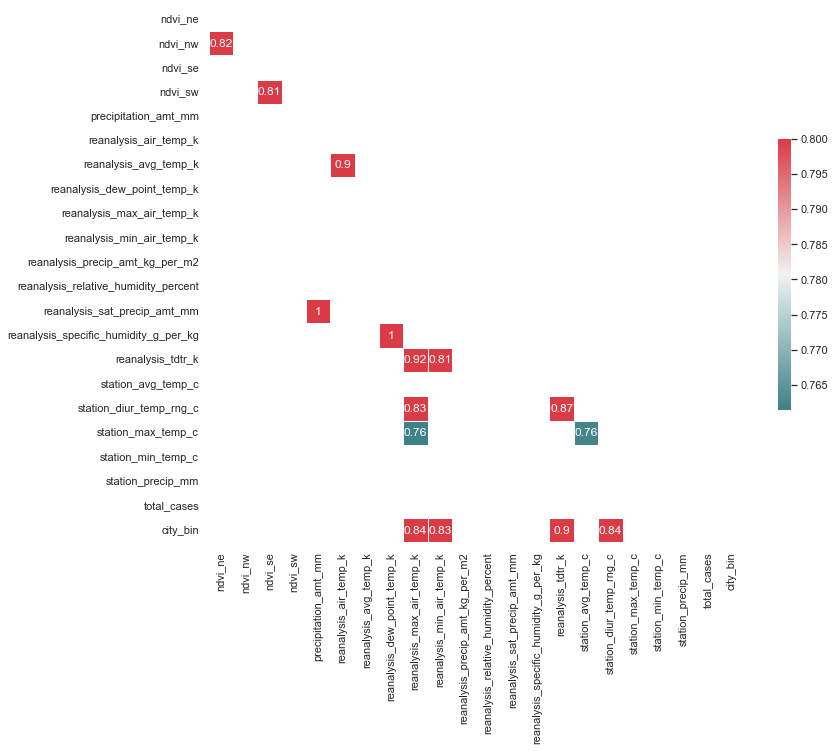

In [221]:
R1_sj = R_sj
for i in range(len(R1_sj)):
  for j in range(len(R1_sj)):
    if abs(R1_sj[i,j]) >= 0.75:
      R1_sj[i,j] = abs(R1_sj[i,j])
    else:
      R1_sj[i,j] = 'NaN'

sns.set(style="white")
mask = np.zeros_like(R1_sj, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(R1_sj, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names_train_select, yticklabels=names_train_select, annot=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Nos quedamos solo con las características que nos interesan:


In [222]:
selected_features = ['station_diur_temp_rng_c','station_avg_temp_c','reanalysis_min_air_temp_k', 'ndvi_se', 'ndvi_nw']


### **Tras varias pruebas, me he dado cuenta que la selección de características obtiene peores resultados que cogiendo el conjunto de todas las variables**

* TRAIN (train test split)
Este paso intermedio, lo hacemos para investigar en los KNN qué número de neighbors sería el más efectivo


In [223]:
train_2, test_2 = train_test_split(train, test_size=0.2, random_state=0)  


In [224]:
x_train = train_2.drop(['total_cases', 'city'], axis=1)
y_train = train_2['total_cases']

x_test = test_2.drop(['total_cases', 'city'], axis = 1)
y_test = test_2['total_cases']

In [225]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
scaler = MinMaxScaler()
## Entrada
x_train_scaled = scaler.fit_transform(x_train)
x_train_2 = pd.DataFrame(x_train_scaled)


x_test_scaled = scaler.fit_transform(x_test)
x_test_2 = pd.DataFrame(x_test_scaled)
# Salida
#y_train_scaled = x_train['total_cases']


In [226]:
x_train_2

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.95,0.403846,0.704776,0.663479,0.326865,0.335767,0.273466,0.327111,0.450617,0.446154,...,0.978758,0.102509,0.699118,0.313354,0.659574,0.509083,0.496774,0.577982,0.035524,0.0
1,0.85,0.653846,0.748995,0.727665,0.452325,0.678454,0.797356,0.833778,0.901235,0.500000,...,0.244226,0.077471,0.352009,0.885384,0.601064,0.678390,0.516129,0.477064,0.000000,0.0
2,0.65,0.384615,0.460416,0.410587,0.303599,0.212979,0.660812,0.599111,0.228395,0.853846,...,0.463396,0.155991,0.555374,0.071504,0.601824,0.198986,0.283871,0.743119,0.018590,1.0
3,0.60,0.596154,0.443524,0.477338,0.481497,0.484179,0.841737,0.784889,0.339506,0.853846,...,0.489957,0.101178,0.741588,0.158780,0.752280,0.139417,0.354839,0.944954,0.006626,1.0
4,0.25,0.057692,0.500761,0.571183,0.348041,0.231111,0.390935,0.388444,0.166667,0.623077,...,0.503219,0.000000,0.369487,0.167192,0.503040,0.400507,0.393548,0.541284,0.018222,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,0.75,1.000000,0.306306,0.322806,0.388228,0.242830,0.535033,0.495111,0.191358,0.769231,...,0.640957,0.384818,0.621202,0.051525,0.515198,0.105196,0.212903,0.743119,0.102522,1.0
1160,0.80,0.365385,0.531868,0.464730,0.400144,0.330301,0.599622,0.549333,0.253086,0.792308,...,0.649706,0.266129,0.688174,0.105152,0.682371,0.240811,0.425806,0.788991,0.028713,1.0
1161,0.75,0.865385,0.927916,0.860925,0.647479,0.863982,0.485741,0.647111,0.580247,0.623077,...,0.866916,0.127675,0.785201,0.529968,0.659574,0.498733,0.503226,0.623853,0.256764,0.0
1162,0.55,0.076923,0.454184,0.459178,0.467646,0.360245,0.441171,0.406222,0.179012,0.661538,...,0.520402,0.060881,0.418817,0.101998,0.408815,0.202788,0.251613,0.587156,0.039757,1.0


* KNN Regressor

In [227]:
# constructor
n_neighbors = 20
mae_val = []
for n in range(n_neighbors):
    n += 1
    weights = 'distance'
    knn = neighbors.KNeighborsRegressor(n_neighbors= n, weights=weights) 
    # fit and predict

    knn.fit(X = x_train_2, y = y_train)
    y_pred_train = knn.predict(x_train_2)
    y_pred_test = knn.predict(x_test_2)
    
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print('MAE TRAIN for neighbors ',n , ' = ' ,mae_train)
    print('MAE TEST for neighbors ',n , ' = ' ,mae_test)

MAE TRAIN for neighbors  1  =  8.317134686195331e-17
MAE TEST for neighbors  1  =  17.376712328767123
MAE TRAIN for neighbors  2  =  6.76725218517289e-07
MAE TEST for neighbors  2  =  16.683946733389238
MAE TRAIN for neighbors  3  =  1.1219396884506698e-06
MAE TEST for neighbors  3  =  16.88903184777444
MAE TRAIN for neighbors  4  =  1.5805002475542311e-06
MAE TEST for neighbors  4  =  18.005029121834816
MAE TRAIN for neighbors  5  =  2.0090764061684144e-06
MAE TEST for neighbors  5  =  17.287008555561634
MAE TRAIN for neighbors  6  =  2.4743219192455063e-06
MAE TEST for neighbors  6  =  17.148735071170552
MAE TRAIN for neighbors  7  =  2.8818975445510744e-06
MAE TEST for neighbors  7  =  16.805747045495714
MAE TRAIN for neighbors  8  =  3.3402789230219876e-06
MAE TEST for neighbors  8  =  16.597275811098108
MAE TRAIN for neighbors  9  =  3.815073032595222e-06
MAE TEST for neighbors  9  =  16.673608233066172
MAE TRAIN for neighbors  10  =  4.341129893044847e-06
MAE TEST for neighbors  

## Con n = 8 da los mejores resultados de MAE en local

In [228]:
# constructor
n_neighbors = 8
n += 1
weights = 'distance'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict
knn.fit(X = x_train_2, y = y_train)
y_pred_train = knn.predict(x_train_2)
y_pred_test = knn.predict(x_test_2)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('MAE TRAIN for neighbors ',n_neighbors , ' = ' ,mae_train)
print('MAE TEST for neighbors ',n_neighbors , ' = ' ,mae_test)

MAE TRAIN for neighbors  8  =  3.3402789230219876e-06
MAE TEST for neighbors  8  =  16.597275811098108


### Repetimos el KNN pero ya para la entrega final

#### Rehacemos el entrenamiento del modelo con el dataset completo de train (sin el split original) y lo entregamos

In [229]:
x_train_full = train.drop(['total_cases', 'city'], axis=1)
y_train = train['total_cases']


x_test = test.drop("city", axis = 1)

#x_test_full = test.drop('total_cases', axis = 1)
#y_test_full = test['total_cases']

Escalado de datos

In [230]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
scaler = MinMaxScaler()

## Entrada
x_train_scaled = scaler.fit_transform(x_train_full)
x_train_full = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test_full = pd.DataFrame(x_test_scaled)

KNN con 8 neighbors para entrega

In [231]:
# constructor
n_neighbors = 8
n += 1
weights = 'distance'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 

# fit and predict
knn.fit(X = x_train_full, y = y_train)
predict = knn.predict(x_test_full)

#mae_train = mean_absolute_error(x_test_full, predict)
predict

array([2.93359081e+01, 1.99247218e+01, 2.40706694e+01, 3.61664342e+01,
       2.89144975e+01, 2.96138209e+01, 1.96393800e+01, 2.65237062e+01,
       3.31358430e+01, 3.73922881e+01, 4.81528765e+01, 5.14960301e+01,
       2.00782247e+01, 4.75021497e+01, 3.36679256e+01, 4.45197025e+01,
       3.91073122e+01, 3.92633505e+01, 3.85227880e+01, 2.61719472e+01,
       4.91459592e+01, 3.67017266e+01, 3.95839921e+01, 6.33196952e+01,
       6.37314432e+01, 4.96343027e+01, 1.73040433e+02, 6.29584231e+01,
       6.50015546e+01, 8.92325504e+01, 6.88404192e+01, 4.99663294e+01,
       5.47562935e+01, 5.96937371e+01, 3.84580351e+01, 2.80586265e+01,
       3.74791634e+01, 2.91747215e+01, 2.78612458e+01, 3.08233026e+01,
       2.83966425e+01, 3.44999540e+01, 2.75625541e+01, 2.75301906e+01,
       2.18687915e+01, 1.58556668e+01, 3.19073326e+01, 2.90768120e+01,
       3.18819178e+01, 2.20347332e+01, 2.11879692e+01, 2.00945689e+01,
       1.39729741e+01, 1.43291975e+01, 1.58014730e+01, 1.54606836e+01,
      

In [232]:
# round the result and cast to int
import numpy as np
y = np.rint(predict) # round
y = y.astype(int) # cast to int
#res = np.hstack(y)


In [233]:
y_pred_no_neg = y.copy()

In [234]:
y_pred_no_neg[y < 0] = 0

In [235]:
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 
                       'total_cases': y_pred_no_neg})
output.to_csv('predictknn8.csv',header = True,index = False, decimal= ",") 

### Con 8 neighbors

![ScreenShoot](knn8.png)

### Intento adicional con 10 neighbors

![ScreenShoot](knn10.png)

# Decision trees

In [236]:
tree_train = train.drop(['total_cases', 'city'], axis = 1)


### Max depth

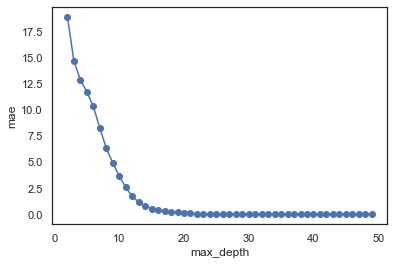

In [237]:
mae = []
from sklearn.metrics import mean_absolute_error
for i in range(2, 50):
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(tree_train, y_train)
    pred_values = regressor.predict(tree_train)
    maev = mean_absolute_error(y_train, pred_values)
    mae.append(maev)
    
# Plot mae   
plt.plot(range(2,50), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

Utilizamos Cross validation para obtener el mejor valor posible para el parámetro max_depth

Min Value 12.566922674960301 (11)


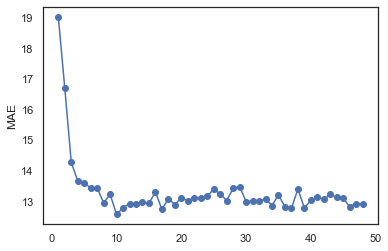

In [238]:
# CROSS VALIDATION ANALYSIS
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import KFold
cv = KFold(n_splits = 10, shuffle = True, random_state=0) # 

total_scores = []
for i in range(2, 50):
   regressor = DecisionTreeRegressor(max_depth=i)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(train):
      # División train test aleatoria
      f_train = train.loc[train_fold]
      f_test = train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['total_cases', 'city'], axis=1), 
                           y = f_train['total_cases'])
      y_pred = regressor.predict(X = f_test.drop(['total_cases', 'city'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['total_cases'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


max_depth = np.argmin(total_scores) + 2
print ('Min Value ' + str(min(total_scores)) +" (" + str(max_depth) + ")")

  
plt.plot(range(1,len(total_scores)+1), total_scores, 
         marker='o')
plt.ylabel('MAE')   

plt.show() 


El valor de mínimo encontrado de MAE en mi local es de 12.5, en el max_depth = 11

In [244]:
max_depth

11

In [240]:
# constructor
regressor = DecisionTreeRegressor(max_depth = max_depth)
# fit and predict

regressor.fit( X = train.drop(['total_cases', 'city'], axis=1), y = train['total_cases'])
y_pred = regressor.predict(X = test.drop(['city'], axis = 1))
#mae = mean_absolute_error(test['total_cases'], y_pred)
# round the result and cast to int

res = np.rint(y_pred) # round
res = res.astype(int) # cast to int

Post procesado para entrega

In [241]:
y_pred_no_neg = res.copy()

In [242]:
y_pred_no_neg[predict< 0] = 0
y_pred_no_neg

array([  6,   6,   6,   6,   6,   6,  21,  21,  34,  21,  21,  21,  53,
        15,  16, 106,  53,  35, 126,  55,  18,  42,  42,  53,  30,   5,
        29,  30,   6,  30,  22,  29,  29,  13,  15,  15,  15,  10,  12,
        12,   8,  28,  28,   8,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,  21,  21,  34,  21,  82,  82,
        82,  82,  35, 170, 126, 126,  53, 106,  18, 126, 126, 126,  35,
       106,   6,  30,  30,  30,  29,  15,  29,  15,  15,  10,  10,  28,
        10,   5,   5,  10,  12,  10,   6,   6,  21,   6,   6,   6,   6,
         6,  21,   6,   6,  21,  42,   6,  18,  42,  42,  34,  33,  42,
        42,  16,  82,  72, 106,  33, 106,  15,  33,  35,  83,  55,  35,
        35,   6,  30,  30,   6,  15,   6,  13,  13,  15,  28,  15,  10,
        10,   8,   8,   8,  28,   5,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,  42,  21,  21,  21,  21,  21,
        21,  42,  55,  16,  55,  83,  16,  33,  21,  21,  19,  2

In [245]:
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 
                       'total_cases': y_pred_no_neg})
output.to_csv('predicttree11.csv',header = True,index = False, decimal= ",") 

Entrega para max_depth = 11:


![ScreenShoot](tree11.png)

Entrega adicional con max_depth = 16

![ScreenShoot](tree.png)